In [1]:
import pandas as pd

lfp_k1_1c_05 = pd.read_excel('LFP_k1_1C_05degC.xlsx')
lfp_k1_1c_25 = pd.read_excel('LFP_k1_1C_25degC.xlsx')
lfp_k1_1c_35 = pd.read_excel('LFP_k1_1C_35degC.xlsx')

nca_k1_1c_05 = pd.read_excel('NCA_k1_1C_05degC.xlsx')
nca_k1_1c_25 = pd.read_excel('NCA_k1_1C_25degC.xlsx')
nca_k1_1c_35 = pd.read_excel('NCA_k1_1C_35degC.xlsx')

nmc_k1_1c_05 = pd.read_excel('NMC_k1_1C_05degC.xlsx')
nmc_k1_1c_25 = pd.read_excel('NMC_k1_1C_25degC.xlsx')
nmc_k1_1c_35 = pd.read_excel('NMC_k1_1C_35degC.xlsx')

In [2]:
lfp_k1 = pd.concat([lfp_k1_1c_05, lfp_k1_1c_25,lfp_k1_1c_35])
nca_k1 = pd.concat([nca_k1_1c_05, nca_k1_1c_25,nca_k1_1c_35])
nmc_k1 = pd.concat([nmc_k1_1c_05, nmc_k1_1c_25,nmc_k1_1c_35])

lfp_k1['Type'] = 'LFP'
nmc_k1['Type'] = 'NMC'
nca_k1['Type'] = 'NCA'




In [3]:
df = pd.concat([lfp_k1, nca_k1,nmc_k1])
df

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Voltage(V),Current(A),Surface_Temp(degC),Type
0,2019-11-18 13:21:44.076,1.000000,0.9998,1,2.962015,0.0,3.979323,LFP
1,2019-11-18 13:21:45.077,2.000800,2.0006,1,2.961883,0.0,4.018199,LFP
2,2019-11-18 13:21:46.078,3.001500,3.0013,1,2.962056,0.0,4.018199,LFP
3,2019-11-18 13:21:47.076,4.000200,4.0000,1,2.962136,0.0,4.018199,LFP
4,2019-11-18 13:21:48.077,5.000700,5.0005,1,2.962051,0.0,4.009704,LFP
...,...,...,...,...,...,...,...,...
26102,2019-10-06 22:59:53.921,26100.704676,3597.0003,6,3.075814,0.0,35.103157,NMC
26103,2019-10-06 22:59:54.921,26101.704776,3598.0004,6,3.075849,0.0,35.103157,NMC
26104,2019-10-06 22:59:55.920,26102.704276,3598.9999,6,3.075856,0.0,35.103157,NMC
26105,2019-10-06 22:59:56.921,26103.705076,3600.0007,6,3.075903,0.0,35.110153,NMC


In [4]:
df.columns

Index(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Voltage(V)',
       'Current(A)', 'Surface_Temp(degC)', 'Type'],
      dtype='object')

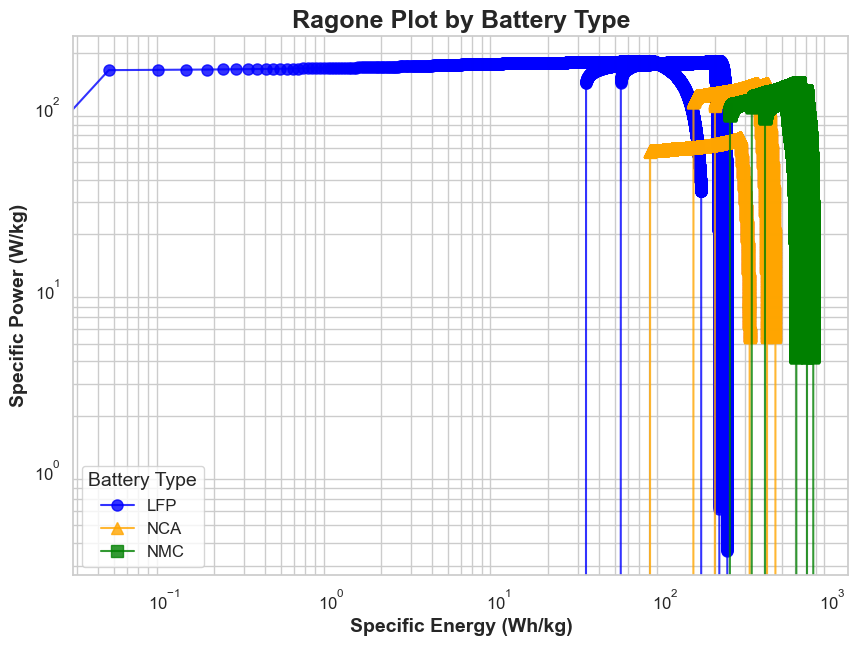

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df['Mass (kg)'] = 0.05  

# Calculate Power and Cumulative Energy
df['Power(W)'] = df['Voltage(V)'] * df['Current(A)']
df['Energy(Wh)'] = (df['Power(W)'] * df['Test_Time(s)'].diff()).cumsum() / 3600  # Energy in Wh
df['Power_Density(W/kg)'] = df['Power(W)'] / df['Mass (kg)']
df['Energy_Density(Wh/kg)'] = df['Energy(Wh)'] / df['Mass (kg)']

# Group by battery type
groups = df.groupby('Type')

# Set Seaborn style for better visuals
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 7))
colors = {'LFP': 'blue', 'NMC': 'green', 'NCA': 'orange'}  # Define custom colors
markers = {'LFP': 'o', 'NMC': 's', 'NCA': '^'}  # Define custom markers

# Plot each group with improved style
for name, group in groups:
    plt.loglog(
        group['Energy_Density(Wh/kg)'], 
        group['Power_Density(W/kg)'], 
        marker=markers[name], 
        linestyle='-', 
        markersize=8,
        color=colors[name], 
        label=name,
        alpha=0.8
    )

plt.title('Ragone Plot by Battery Type', fontsize=18, weight='bold')
plt.xlabel('Specific Energy (Wh/kg)', fontsize=14, weight='bold')
plt.ylabel('Specific Power (W/kg)', fontsize=14, weight='bold')
plt.grid(which='both')

# Add a legend
plt.legend(title='Battery Type', fontsize=12, title_fontsize=14, loc='lower left', frameon=True)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Tight layout for better spacing

# Show the plot
plt.show()


In [6]:
df.columns

Index(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Voltage(V)',
       'Current(A)', 'Surface_Temp(degC)', 'Type', 'Mass (kg)', 'Power(W)',
       'Energy(Wh)', 'Power_Density(W/kg)', 'Energy_Density(Wh/kg)'],
      dtype='object')

## Linear Regression

Mean Squared Error: 0.00
R^2 Score: 1.00


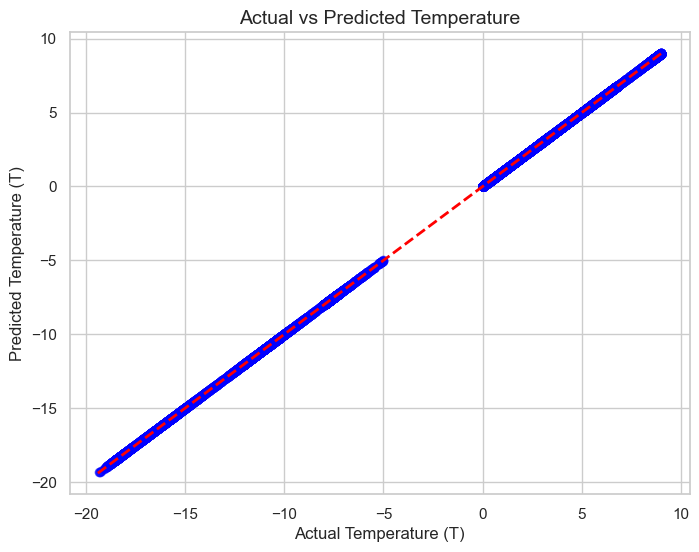

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming the dataset 'df' contains columns: 'C' (Charge Rate), 'V' (Voltage), 'T' (Temperature)
# Compute Energy (E)
df['Energy'] = df['Current(A)'] * df['Voltage(V)']

# Features and Target
X = df[['Current(A)', 'Voltage(V)', 'Surface_Temp(degC)']]  # Independent variables
y = df['Energy']              # Dependent variable (Temperature)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted temperature
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Temperature (T)', fontsize=12)
plt.ylabel('Predicted Temperature (T)', fontsize=12)
plt.title('Actual vs Predicted Temperature', fontsize=14)
plt.grid(True)
plt.show()


Coefficients for all features:
Feature 0: 3.382480804424639
Feature 1: -0.017486703797998337
Feature 2: 0.0019959885654569163
Coefficient for Current (C): 3.382480804424639
Coefficient for Voltage (V): -0.017486703797998337
Coefficient for Surface Temperature (T): 0.0019959885654569163


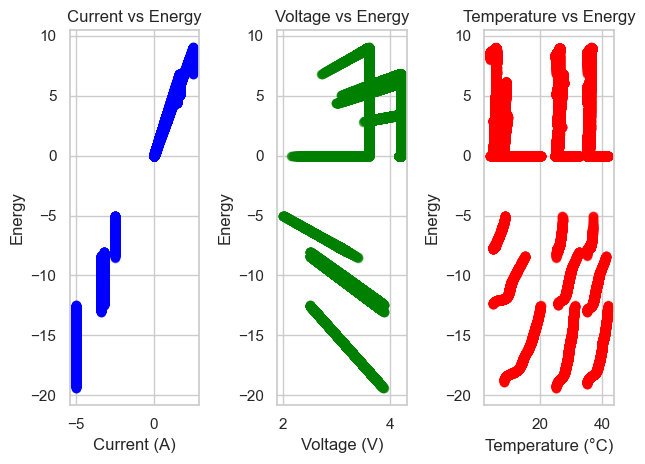

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data
X = df[['Current(A)', 'Voltage(V)', 'Surface_Temp(degC)']]  # Independent variables
y = df['Energy']  # Dependent variable (continuous)

# Fit the Linear Regression model
linear_model = LinearRegression().fit(X, y)

# Coefficients for all features (Current, Voltage, Temperature)
coefficients = linear_model.coef_

# Print all coefficients
print("Coefficients for all features:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i}: {coef}")

# Coefficients for Current (C), Voltage (V), and Surface Temperature (T)
print(f"Coefficient for Current (C): {coefficients[0]}")  # First feature in X
print(f"Coefficient for Voltage (V): {coefficients[1]}")  # Second feature in X
print(f"Coefficient for Surface Temperature (T): {coefficients[2]}")  # Third feature in X

# Scatter plot for each feature (Current, Voltage, Temperature) vs Energy
plt.subplot(1, 3, 1)
plt.scatter(df['Current(A)'], df['Energy'], color='blue', alpha=0.5)
plt.title('Current vs Energy')
plt.xlabel('Current (A)')
plt.ylabel('Energy')

plt.subplot(1, 3, 2)
plt.scatter(df['Voltage(V)'], df['Energy'], color='green', alpha=0.5)
plt.title('Voltage vs Energy')
plt.xlabel('Voltage (V)')
plt.ylabel('Energy')

plt.subplot(1, 3, 3)
plt.scatter(df['Surface_Temp(degC)'], df['Energy'], color='red', alpha=0.5)
plt.title('Temperature vs Energy')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()

R² Score: 0.9910825625006316
Mean Squared Error: 0.29124659758809907


/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


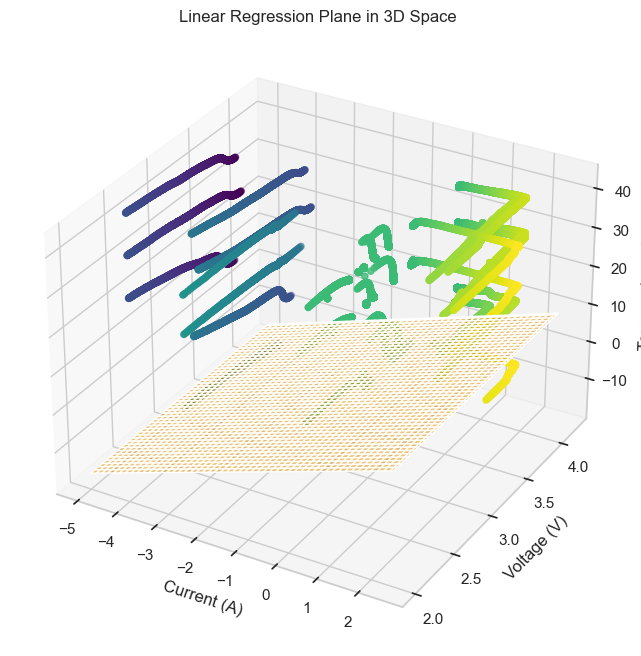

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['Current(A)', 'Voltage(V)', 'Surface_Temp(degC)']]  # Independent variables
y = df['Energy']  # Dependent variable (continuous)

# Fit the Linear Regression model
linear_model = LinearRegression().fit(X, y)

# Generate predictions for the entire dataset
y_pred = linear_model.predict(X)

# Compute R^2 (Coefficient of Determination)
r_squared = linear_model.score(X, y)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print R² and MSE
print(f"R² Score: {r_squared}")
print(f"Mean Squared Error: {mse}")

# Generate a meshgrid for plotting the regression plane
x_range = np.linspace(df['Current(A)'].min(), df['Current(A)'].max(), 100)
y_range = np.linspace(df['Voltage(V)'].min(), df['Voltage(V)'].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Predict the z-values (Energy) for each point on the grid
z_mesh = linear_model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel(), np.ones_like(x_mesh.ravel()) * df['Surface_Temp(degC)'].mean()]).reshape(x_mesh.shape)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
scatter = ax.scatter(X['Current(A)'], X['Voltage(V)'], X['Surface_Temp(degC)'], c=y, cmap='viridis')

# Plot the regression plane
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='orange', alpha=0.5)

# Labels and title
ax.set_xlabel('Current (A)')
ax.set_ylabel('Voltage (V)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Linear Regression Plane in 3D Space')

# Show the plot
plt.show()



## Polynomial Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data
X = df[['Current(A)', 'Voltage(V)', 'Surface_Temp(degC)']]  # Independent variables
y = df['Energy']  # Dependent variable (continuous)

# Apply Polynomial Features (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
poly_model = LinearRegression().fit(X_poly, y)

# Coefficients for all features (including interaction and squared terms)
coefficients = poly_model.coef_

# Print all coefficients with clarification
print("Coefficients for all features (including interaction and squared terms):")

# Get feature names to print them alongside the coefficients
feature_names = poly.get_feature_names_out(['Current(A)', 'Voltage(V)', 'Surface_Temp(degC)'])

for feature, coef in zip(feature_names, coefficients):
    print(f"Coefficient for {feature}: {coef}")

# Specifically print the coefficients for Current (C), Voltage (V), and Surface Temperature (T)
print('__________________________________________________________')
print(f"Coefficient for Current (C): {coefficients[0]}")  # First feature in X_poly
print(f"Coefficient for Voltage (V): {coefficients[1]}")  # Second feature in X_poly
print(f"Coefficient for Surface Temperature (T): {coefficients[2]}")  # Third feature in X_poly



Coefficients for all features (including interaction and squared terms):
Coefficient for Current(A): -3.177331800314003e-14
Coefficient for Voltage(V): -8.715250743307479e-15
Coefficient for Surface_Temp(degC): -2.409011238222096e-16
Coefficient for Current(A)^2: -6.125161257630518e-16
Coefficient for Current(A) Voltage(V): 1.0000000000000093
Coefficient for Current(A) Surface_Temp(degC): -3.868297172431253e-17
Coefficient for Voltage(V)^2: 1.4397815553560991e-15
Coefficient for Voltage(V) Surface_Temp(degC): -7.185647863802896e-17
Coefficient for Surface_Temp(degC)^2: 5.899022987668875e-16
__________________________________________________________
Coefficient for Current (C): -3.177331800314003e-14
Coefficient for Voltage (V): -8.715250743307479e-15
Coefficient for Surface Temperature (T): -2.409011238222096e-16


In [11]:
# Make predictions using the polynomial regression model
y_pred = poly_model.predict(X_poly)

# Calculate R² (R-squared) score
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print R² and MSE
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 1.0
Mean Squared Error: 8.605641772739674e-26


#### An R² score of 1.0 means that the model perfectly explains the variance in the dependent variable (Energy). This is an ideal situation where the model fits the data perfectly and makes predictions with no error. However, this could also suggest overfitting if the model is too complex or if there are issues in the data (like data leakage or multicollinearity).

#### Mean Squared Error (MSE): 8.605641772739674e-26: The very small value of MSE indicates that the model's predictions are extremely close to the actual values. The number is so small that it's almost negligible, which again suggests that the model is fitting the data almost perfectly. This could also be a sign of overfitting if the model has too many features or too much flexibility.


## Hyperparameter Tuning

In [12]:
from sklearn.linear_model import Ridge


# Prepare the data (same as before)
X = df[['Current(A)', 'Voltage(V)', 'Surface_Temp(degC)']]  # Independent variables
y = df['Energy']  # Dependent variable (continuous)

# Apply Polynomial Features (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the Ridge Regression model (L2 Regularization)
ridge_model = Ridge(alpha=1)  # alpha is the regularization strength
ridge_model.fit(X_poly, y)

# Make predictions
y_pred_ridge = ridge_model.predict(X_poly)

# Calculate R² and MSE for Ridge Regression
r2_ridge = r2_score(y, y_pred_ridge)
mse_ridge = mean_squared_error(y, y_pred_ridge)

# Print results
print(f"R² Score for Ridge Regression: {r2_ridge}")
print(f"Mean Squared Error for Ridge Regression: {mse_ridge}")


R² Score for Ridge Regression: 0.9999999999967368
Mean Squared Error for Ridge Regression: 1.0657499104482454e-10


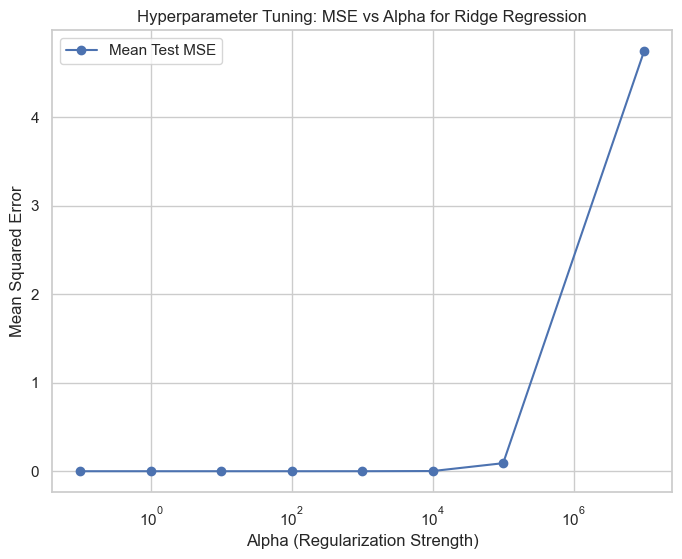

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000,100000,10000000]}

# Set up the Ridge regression model
ridge_model = Ridge()

# Set up GridSearchCV with 5-fold cross-validation and use MSE as scoring metric
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_poly, y)

# Extract the mean test scores (negative MSE from GridSearchCV)
mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Negate to get positive MSE
alpha_values = grid_search.cv_results_['param_alpha'].data  # Alpha values used in the search

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, mean_test_scores, marker='o', linestyle='-', color='b', label='Mean Test MSE')

# Adding labels and title
plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning: MSE vs Alpha for Ridge Regression')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model (Ridge Regression in this case)
model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000]}

# Setup GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best value for alpha
print(f"Best value of alpha: {best_params['alpha']}")

# Evaluate the best model using R² score and MSE on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score = best_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2_score}")
print(f"Mean Squared Error: {mse}")



Best value of alpha: 0.1
R² Score: 0.9999999999999493
Mean Squared Error: 1.6564336452340746e-12
